**Fuerza de Magnus**

\begin{equation}
\frac{\vec{F}}{m}=g-C_{d}\left | \vec{v} \right |\vec{v}+C_{m} \vec{\omega}\times\vec{v}
\end{equation}

**Condiciones iniciales**

\begin{equation}
z_{0}=1.8 [m]\\
x_{0}=18 [m]\\
v_{0}=40 [m/s]
\end{equation}

 **a) Encontrar el angulo θ tal que en x=0 y= 1.5; para Cd=Cm=0.**
 
Podemos encontrar el valor analítico de θ  para que se cumpla esta condición usando las ecuaciones de tiro parabólico:
 
\begin{equation}
x=x_{0}+v_{0x}t \\
z=z_{0}+v_{0z}t-\frac{1}{2}gt^{2}
\end{equation}

\begin{equation}
0=18-40cos\left ( \theta  \right )t \\
t=\frac{18}{40cos\left ( \theta  \right )} \\
\end{equation}

\begin{equation}
1.5=1.8+40sen\left ( \theta  \right )\left ( \frac{18}{40cos(\theta )} \right )-\frac{1}{2}(9.8)\left ( \frac{18}{40cos(\theta )} \right )^{2}\\
\end{equation}

\begin{equation}
0.3=18tan(\theta )-0.99225sec^{2}(\theta ) \\
\end{equation}

\begin{equation}
0.99225tan^{2}(\theta)-18tan(\theta)+0.69225\\
\end{equation}

\begin{equation}
tan(\theta)=0.0385\Rightarrow \theta=2.2^{o}
\end{equation}

In [1]:
from math import sin,cos, pi, sqrt
from numpy import arange
from pylab import plot,xlabel,ylabel,show,xlim,ylim,legend,grid

In [2]:
def ace(x,t):
    m=1490 #g
    g=9.8 #m/s
    return -g

In [3]:
#Runge-kutta

ti = 0.0    #inicio del intervalo
tf = 1.0   #final del intervalo
N = 300  # numero de pasos
h = (tf-ti)/N # tamaño de un paso

V= []
X= []
Z= []
Vx=[]
Vz=[]

tpoints = arange(ti,tf,h)

the=(2.2*pi)/180 #ángulo inicial
V0=40 #m/s       #magnitud de la velocidad inicial
vx=-V0*cos(the)  #velocidad inicial en x
vz=V0*sin(the)   #velocidad inicial en z
z=1.8 #m         #altura inicial en z
x=18  #m         # distancia inicial en x

for t in tpoints:
    v =sqrt(vx*vx+vz*vz)
    V.append(v)
    Vz.append(vz)
    Vx.append(vx)
    Z.append(z)
    X.append(x)
    
    k1v =h*ace(x,t)
    k2v =h*ace(x+0.5*h,t+0.5*k1v)
    k3v =h*ace(x+0.5*h,t+0.5*k2v)
    k4v =h*ace(x+h,t+k3v)
    vz +=(1/6)*(k1v+2*k2v+2*k3v+k4v)
    
    z +=h*vz
    x +=h*vx

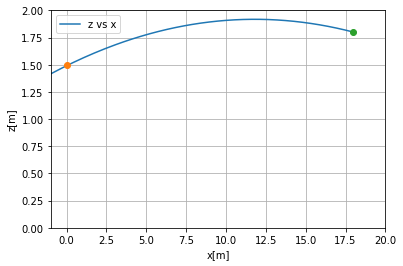

In [4]:
plot (X,Z, label='z vs x')
plot (0, 1.5, 'o')
plot (18, 1.8, 'o')
legend()
xlabel("x[m]")
ylabel("z[m]")
xlim(-1,20)
ylim(0,2)
grid()
show()

**b) Ahora vamos a tomar en cuenta la resistencia opuesta por el aire, por lo tanto la ecuación para la acerelaracion queda modificada como:**

\begin{equation}
\vec{a}=-g\hat{z}-c_{d}\left |\vec{v}  \right |v_{x}\hat{x} 
\end{equation}

**Si suponemos que solo existe resistencia en la direccion x**

In [5]:
Cd=6e-3
m=0.1490 #kg
g=9.8 #m/s
cm=1e-3
def acex(vx,t):
    return -Cd*v*vx

def acez(vz,t):
    return -g

In [6]:
the=(2.2*pi)/180 #ángulo inicial
V0=40 #m/s       #magnitud de la velocidad inicial
vx=-V0*cos(the)  #velocidad inicial en x
vz=V0*sin(the)   #velocidad inicial en z
z=1.8 #m         #altura inicial en z
x=18  #m         # distancia inicial en x

V2=[]
V2z=[]
V2x=[]
Z2=[]
X2=[]

for t in tpoints:
    v =sqrt(vx*vx+vz*vz)
    V2.append(v)
    V2z.append(vz)
    V2x.append(vx)
    Z2.append(z)
    X2.append(x)
    
    k1vx =h*acex(vx,t)
    k2vx =h*acex(vx+0.5*h,t+0.5*k1vx)
    k3vx =h*acex(vx+0.5*h,t+0.5*k2vx)
    k4vx =h*acex(vx+h,t+k3vx)
    vx +=(1/6)*(k1vx+2*k2vx+2*k3vx+k4vx)
      
    k1vz =h*acez(vz,t)
    k2vz =h*acez(vz+0.5*h,t+0.5*k1vz)
    k3vz =h*acez(vz+0.5*h,t+0.5*k2vz)
    k4vz =h*acez(vz+h,t+k3vz)
    vz +=(1/6)*(k1vz+2*k2vz+2*k3vz+k4vz)

    
    z +=h*vz
    x +=h*vx

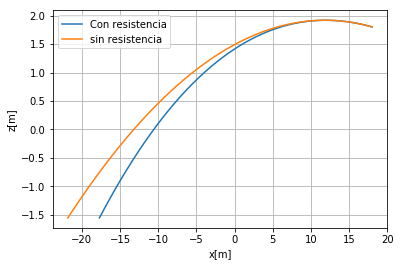

In [7]:
plot (X2,Z2, label='Con resistencia')
plot (X,Z,label='sin resistencia')
legend()
xlabel("x[m]")
ylabel("z[m]")
grid()
show()

**Se evidencia que la trayectoria descrita teniendo en cuenta la resistencia del aire tiene un alcanze menor y por lo tanto no logra llegar al punto (x=0,z=1.5)**

**Para el tercer caso debemos tener en cuenta el efecto Magnus, suponiendo que el vector velocida angular tiene direccion primero en Y positiva y luego en Y negativa, entonces la ecuacion para la aceleracion es:**

\begin{equation}
\vec{a}=-g\hat{z}-c_{d}\left |\vec{v}  \right |v_{x}\hat{x} +c_{m}\omega\hat{y} \times \left ( v_{x}\hat{x}+v_{z}\hat{z} \right )
\end{equation}


**Para w en Y**
\begin{equation}
a_{x}=-c_{d}\left |\vec{v}  \right |v_{x}+c_{m}\omega v_{z}
\end{equation}


\begin{equation}
a_{z}=-g-c_{m}\omega v_{x}
\end{equation}

**Para w en -Y**

\begin{equation}
a_{x}=-c_{d}\left |\vec{v}  \right |v_{x}-c_{m}\omega v_{z}
\end{equation}


\begin{equation}
a_{z}=-g+c_{m}\omega v_{x}
\end{equation}



In [28]:
#caso3
w=200 #rad/s
Cd=6e-3
m=0.1490 #kg
g=9.8 #m/s
cm=4e-4

#aceleraión para w en direccion Y positiva
def acexx(vx,vz,t):
    return -Cd*v*vx+cm*w*vz

def acezz(vz,vx,t):
    return -g-m*w*vx

#aceleraión para w en direccion Y negativa

def Acexx(vx,vz,t):
    return -Cd*v*vx-cm*w*vz

def Acezz(vz,vx,t):
    return -g+m*w*vx   

In [29]:
the=(2.2*pi)/180 #ángulo inicial
V0=40 #m/s       #magnitud de la velocidad inicial
vx=-V0*cos(the)  #velocidad inicial en x
vz=V0*sin(the)   #velocidad inicial en z
z=1.8 #m         #altura inicial en z
x=18  #m         # distancia inicial en x

V3=[]
V3z=[]
V3x=[]
Z3=[]
X3=[]

for t in tpoints:
    v =sqrt(vx*vx+vz*vz)
    V3.append(v)
    V3z.append(vz)
    V3x.append(vx)
    Z3.append(z)
    X3.append(x)
    
    k1vx =h*acexx(vx,vz,t)
    k2vx =h*acexx(vx+0.5*h,vz+0.5*h,t+0.5*k1vx)
    k3vx =h*acexx(vx+0.5*h,vz+0.5*h,t+0.5*k2vx)
    k4vx =h*acexx(vx+h,vz+h,t+k3vx)
    vx +=(1/6)*(k1vx+2*k2vx+2*k3vx+k4vx)
      
    k1vz =h*acezz(vz,vx,t)
    k2vz =h*acezz(vz+0.5*h,vx+0.5*h,t+0.5*k1vz)
    k3vz =h*acezz(vz+0.5*h,vx+0.5*h,t+0.5*k2vz)
    k4vz =h*acezz(vz+h,vx+h,t+k3vz)
    vz +=(1/6)*(k1vz+2*k2vz+2*k3vz+k4vz)
    
    z +=h*vz
    x +=h*vx

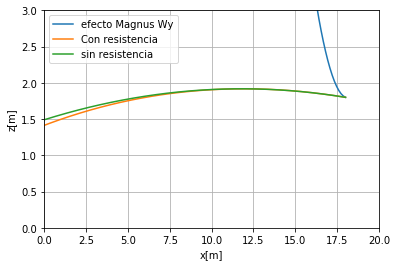

In [30]:
plot (X3,Z3, label='efecto Magnus Wy')
plot (X2,Z2, label='Con resistencia')
plot (X,Z,label='sin resistencia')
legend()
xlabel("x[m]")
ylabel("z[m]")
xlim(0,20)
ylim(0,3)
grid()
show()

In [26]:
the=(2.2*pi)/180 #ángulo inicial
V0=40 #m/s       #magnitud de la velocidad inicial
vx=-V0*cos(the)  #velocidad inicial en x
vz=V0*sin(the)   #velocidad inicial en z
z=1.8 #m         #altura inicial en z
x=18  #m         # distancia inicial en x

V4=[]
V4z=[]
V4x=[]
Z4=[]
X4=[]

for t in tpoints:
    v =sqrt(vx*vx+vz*vz)
    V4.append(v)
    V4z.append(vz)
    V4x.append(vx)
    Z4.append(z)
    X4.append(x)
    
    k1vx =h*Acexx(vx,vz,t)
    k2vx =h*Acexx(vx+0.5*h,vz+0.5*h,t+0.5*k1vx)
    k3vx =h*Acexx(vx+0.5*h,vz+0.5*h,t+0.5*k2vx)
    k4vx =h*Acexx(vx+h,vz+h,t+k3vx)
    vx +=(1/6)*(k1vx+2*k2vx+2*k3vx+k4vx)
      
    k1vz =h*Acezz(vz,vx,t)
    k2vz =h*Acezz(vz+0.5*h,vx+0.5*h,t+0.5*k1vz)
    k3vz =h*Acezz(vz+0.5*h,vx+0.5*h,t+0.5*k2vz)
    k4vz =h*Acezz(vz+h,vx+h,t+k3vz)
    vz +=(1/6)*(k1vz+2*k2vz+2*k3vz+k4vz)
    
    z +=h*vz
    x +=h*vx

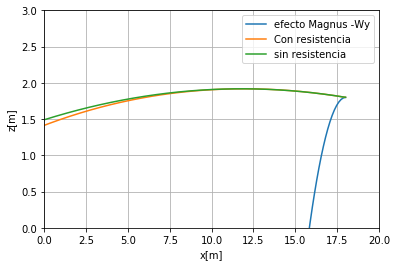

In [31]:
plot (X4,Z4, label='efecto Magnus -Wy')
plot (X2,Z2, label='Con resistencia')
plot (X,Z,label='sin resistencia')
legend()
xlabel("x[m]")
ylabel("z[m]")
xlim(0,20)
ylim(0,3)
grid()
show()

**Por otra parte, se observó que teniendo en cuenta el efecto Magnus la trayectoria deja de ser parabólica y ademas la bola alcanza una altura mayor si la direccion de la velocida angular está en dirección Y positiva, sin embargo si la dirección de la velocida es contraria, el alcanze de la pelota tanto horizontal como vertical se ve reducido considerablemtente, esto es lo esperado teniendo en cuenta que el producto cruz aumenta o diminuye el valor de la aceleracion en la dirreción correspondiente dependiendo de la dirección de la rotación**